In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('sales_data_sample.csv', encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
pd.isnull(df).sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [7]:
df.drop(columns=['ADDRESSLINE2','STATE','TERRITORY','POSTALCODE'], inplace=True)


In [9]:
pd.isnull(df).sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [11]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium


# Plotting 

Text(0, 0.5, 'Quantity Ordered')

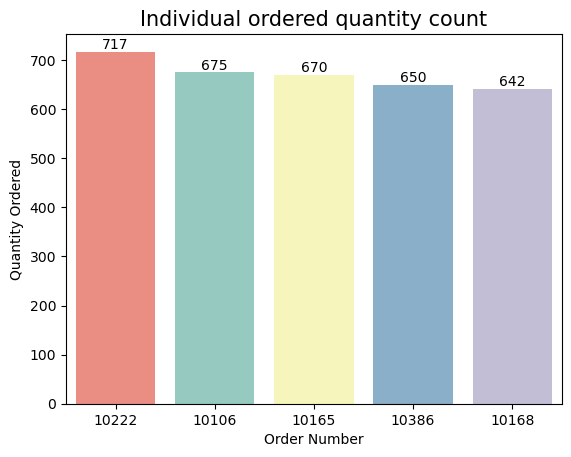

In [14]:
each_person =df.groupby(['ORDERNUMBER'],as_index=False)['QUANTITYORDERED'].sum().sort_values(by='QUANTITYORDERED',ascending=False).head(5)
z=sns.barplot(x='ORDERNUMBER',y='QUANTITYORDERED',data=each_person,order=each_person['ORDERNUMBER'],palette='Set3',hue='ORDERNUMBER',legend=False)

for i in z.containers:
    z.bar_label(i)
plt.title("Individual ordered quantity count",fontsize=15)
plt.xlabel('Order Number')
plt.ylabel('Quantity Ordered')

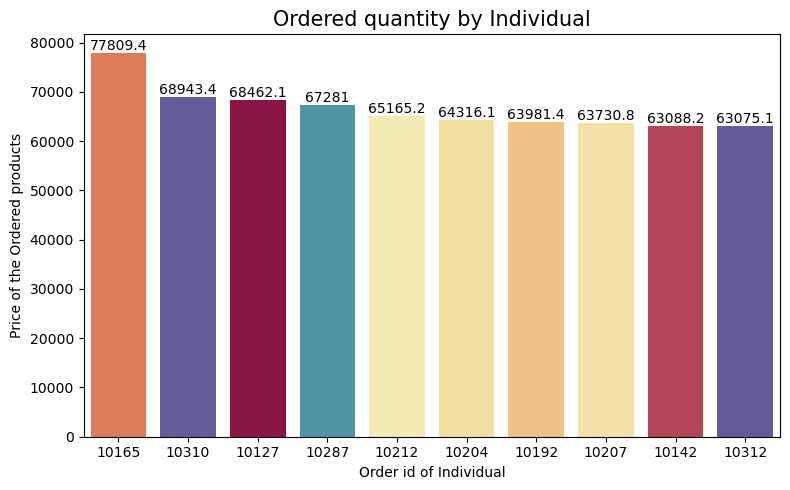

In [16]:
p_sale= df.groupby(['ORDERNUMBER'],as_index=False)['SALES'].sum().sort_values(by='SALES',ascending=False).head(10)
plt.figure(figsize=(8,5))
z=sns.barplot(x='ORDERNUMBER',y='SALES',data=p_sale,order=p_sale['ORDERNUMBER'],palette='Spectral',hue='ORDERNUMBER',legend=False)

for i in z.containers:
    z.bar_label(i)
plt.title("Ordered quantity by Individual",fontsize=15)
plt.xlabel('Order id of Individual')
plt.ylabel('Price of the Ordered products')
plt.tight_layout()

Text(0, 0.5, 'Quantity Ordered')

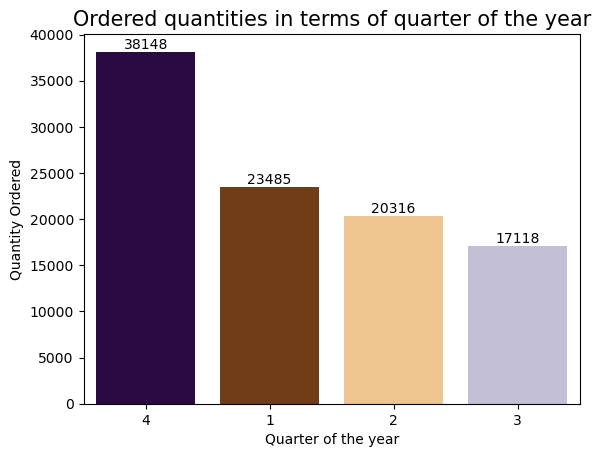

In [18]:
each_person_y =df.groupby(['QTR_ID'],as_index=False)['QUANTITYORDERED'].sum().sort_values(by='QUANTITYORDERED',ascending=False)
z=sns.barplot(x='QTR_ID',y='QUANTITYORDERED',data=each_person_y,order=each_person_y['QTR_ID'],palette='PuOr',hue='QTR_ID',legend=False)

for i in z.containers:
    z.bar_label(i)
plt.title("Ordered quantities in terms of quarter of the year",fontsize=15)
plt.xlabel('Quarter of the year')
plt.ylabel('Quantity Ordered')

Text(0, 0.5, 'Quantity Ordered')

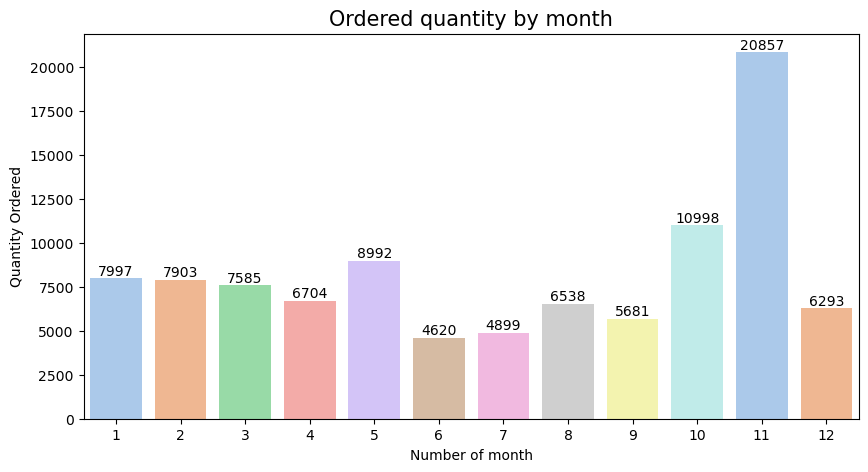

In [20]:
m_sale =df.groupby(['MONTH_ID'],as_index=False)['QUANTITYORDERED'].sum().sort_values(by='QUANTITYORDERED',ascending=False)
plt.figure(figsize=(10,5))
z=sns.barplot(x='MONTH_ID',y='QUANTITYORDERED',data=m_sale,palette='pastel',hue='MONTH_ID',legend=False)

for i in z.containers:
    z.bar_label(i)
plt.title("Ordered quantity by month",fontsize=15)
plt.xlabel('Number of month')
plt.ylabel('Quantity Ordered')

Text(0, 0.5, 'Quantity Ordered')

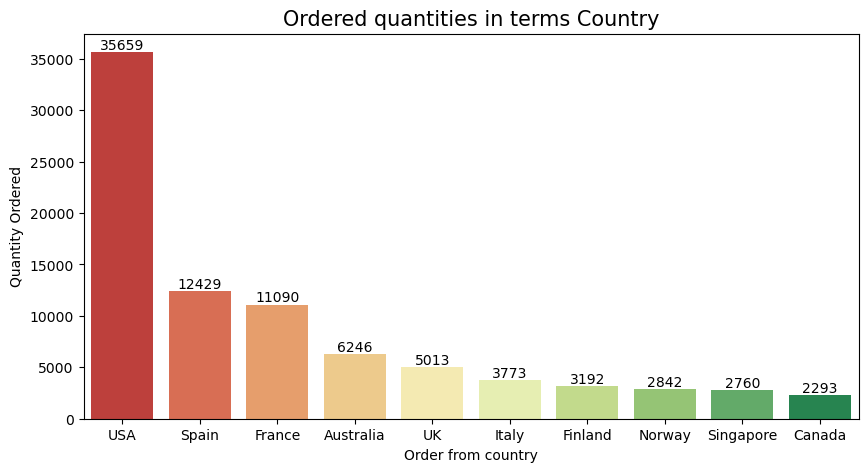

In [22]:
each_person_c =df.groupby(['COUNTRY'],as_index=False)['QUANTITYORDERED'].sum().sort_values(by='QUANTITYORDERED',ascending=False).head(10)
plt.figure(figsize=(10,5))
z=sns.barplot(x='COUNTRY',y='QUANTITYORDERED',data=each_person_c,order=each_person_c['COUNTRY'],palette='RdYlGn',hue='COUNTRY',legend=False)


for i in z.containers:
    z.bar_label(i)
plt.title("Ordered quantities in terms Country",fontsize=15)
plt.xlabel('Order from country')
plt.ylabel('Quantity Ordered')


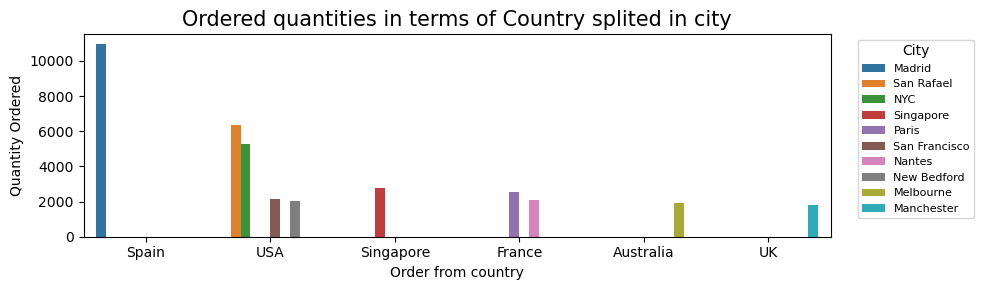

In [24]:
city_country= df.groupby(['COUNTRY','CITY'],as_index=False)['QUANTITYORDERED'].sum().sort_values(by='QUANTITYORDERED',ascending=False).head(10)
plt.figure(figsize=(10,3))
sns.barplot(x='COUNTRY',y='QUANTITYORDERED',data=city_country,hue='CITY')
plt.legend(title='City', fontsize=8, title_fontsize='10', loc='upper right', bbox_to_anchor=(1.20, 1))

plt.title("Ordered quantities in terms of Country splited in city",fontsize=15)
plt.xlabel('Order from country')
plt.ylabel('Quantity Ordered')
plt.tight_layout()


Text(0.5, 1.0, 'Status of order')

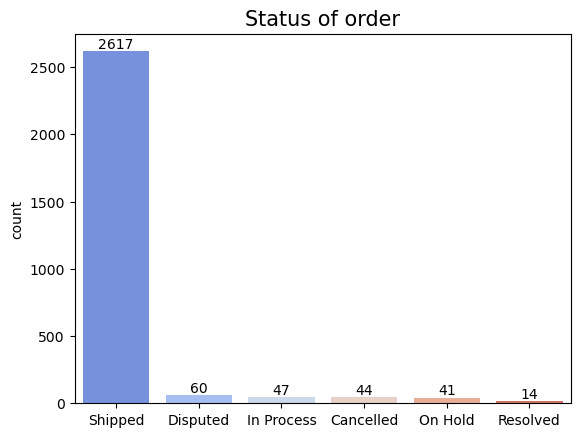

In [26]:
a=sns.barplot(x=df['STATUS'].unique(),y=df['STATUS'].value_counts(),hue=df['STATUS'].unique(),palette='coolwarm')
for i in a.containers:
    a.bar_label(i)
plt.title("Status of order",fontsize=15)